In [199]:
# loading libraries and reading the data
import numpy 
import pandas

# read data files, companies.csv
# using encoding = "ISO-8859-1" to avoid pandas encoding error
companies=pandas.read_csv(r"C:\Users\Manjari Singh\Desktop\Data\companies.csv", encoding = 'ISO-8859-1')

# handle ascii characters
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [201]:
# read read data files, rounds2.csv
rounds2 = pandas.read_csv(r"C:\Users\Manjari Singh\Desktop\Data\rounds2.csv", encoding = "ISO-8859-1")
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [202]:
# Converting each entries in lowercase and trim whitespaces if any for removing duplicates in companies['permalink'] and rounds2['company_permalink']
companies['permalink']=companies['permalink'].apply(lambda x: x.lower())
companies['permalink']=companies['permalink'].str.strip()
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [203]:
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x: x.lower())
rounds2['company_permalink'] =rounds2['company_permalink'].str.strip()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [204]:
# How many unique companies are present in rounds2?
rounds2_uniquecount=rounds2.company_permalink.nunique()
print(rounds2_uniquecount)

66368


In [205]:
#How many unique companies are present in the companies file?
companies_uniquecount=companies.permalink.nunique()
print(companies_uniquecount)

66368


In [206]:
# In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
# lets caclulate number of rows in companies
print(companies.shape[0])
# as the number of rows in companies dataframe == companies_uniquecount , the 'permalink' can be selected for primary key

66368


In [207]:
# set primary key as 'permalink' for companies dataframe
companies.set_index('permalink', inplace=True)
companies.head()

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
permalink,,,,,,,,,
/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [208]:
# Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

round2_set= set(rounds2.company_permalink.str.strip().str.lower().unique())

# First columns is called index and companies.permalink is index , index is not accessible via df['index column name']
companies_set=set(companies.index.str.strip().str.lower().unique())

if len(companies_set - round2_set)==0:
    print("N")
# In both the sets difference is 0 so, there are 0 companies in round2 which are not present in companies.


N


In [209]:
# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
# Name the merged frame master_frame. How many observations are present in master_frame?

#Merging companies and rounds2
master_frame=pandas.merge( companies, rounds2, how="inner", left_on="permalink", right_on="company_permalink")
print(master_frame.shape[0])

114949


*Data Cleaning

Checking Null Values and Dropping unnecessary columns

In [210]:
# cleaning the master_frame 
# Inspecting columnwise null/Nans
nullcheck=master_frame.isnull().sum(axis=0)
print(nullcheck)

name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64


In [211]:
# percentage of missing values
percentage = round(100*(nullcheck/len(master_frame.company_permalink)),2)
print(percentage)

name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


In [215]:
# checking stats for column 'raised_amount_usd'
master_frame.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [216]:
# as standard deviations are high for in it and even there is signification gap when compare 25% - 75% 
#removing the unknows values in the column.
master_frame=master_frame[~numpy.isnan(master_frame.raised_amount_usd)]

# changing the scale of 'raised_amount_usd' from 1 $ to 1 million $ and rounding off to 3 decimal places
master_frame.raised_amount_usd=master_frame.raised_amount_usd.apply(lambda x :round(x/1000000,3) )

# rename the column 'raised_amount_usd' to 'raised_amount_usd_in_mil'
master_frame=master_frame.rename(columns= {'raised_amount_usd': 'raised_amount_usd_in_mil'})



In [217]:
# recheck percentage of missing values
round(100*(master_frame.isnull().sum()/len(master_frame.company_permalink)),2)

name                         0.00
homepage_url                 4.56
category_list                1.10
status                       0.00
country_code                 6.16
state_code                   8.01
region                       7.42
city                         7.42
founded_at                  16.81
company_permalink            0.00
funding_round_permalink      0.00
funding_round_type           0.00
funding_round_code          70.34
funded_at                    0.00
raised_amount_usd_in_mil     0.00
dtype: float64

In [218]:
# drop the column 'region' as city already has the same data
master_frame = master_frame.drop('region', axis=1)
#remove the Nans from city
master_frame=master_frame[~master_frame.city.isnull()]
#remove the Nans from category_list
master_frame=master_frame[~master_frame.category_list.isnull()]

#calculating average investment amount for each of the four funding types and rounding it to 2 decimal places

In [220]:
# venture type 
round(master_frame.loc[ (master_frame.funding_round_type =='venture'),['raised_amount_usd_in_mil']].mean(),2)

raised_amount_usd_in_mil    11.74
dtype: float64

In [221]:
# angel type
round(master_frame.loc[ (master_frame.funding_round_type =='angel'),['raised_amount_usd_in_mil']].mean(),2)

raised_amount_usd_in_mil    0.97
dtype: float64

In [222]:
# seed type
round(master_frame.loc[ (master_frame.funding_round_type =='seed'),['raised_amount_usd_in_mil']].mean(),2)

raised_amount_usd_in_mil    0.74
dtype: float64

In [223]:
# private_equity type
round(master_frame.loc[ (master_frame.funding_round_type =='private_equity'),['raised_amount_usd_in_mil']].mean(),2)


#  which investment type is the most suitable ? ='venture' as data lies between 5 -15

raised_amount_usd_in_mil    70.8
dtype: float64

# Checkpoint 3: Country Analysis

In [224]:

# top nine countries which have received the highest total funding
master_frame_byVenture=master_frame.loc[(master_frame.funding_round_type=='venture')]
venture_byCountry=master_frame_byVenture.groupby('country_code')
venture_totalfund_byCountry=venture_byCountry['raised_amount_usd_in_mil'].sum().sort_values(ascending=False)

# data frame named top9 with the top nine countries
# this gives series --> top9=venture_totalfund_byCountry.nlargest(9)

# this gives dataframe
top9=master_frame_byVenture.groupby('country_code',as_index=False)['raised_amount_usd_in_mil'].sum().sort_values(by=['raised_amount_usd_in_mil'],ascending=False).head(9)
top9
# Identify the top three English-speaking countries in the data frame top9. USA , GBR,IND

,country_code,raised_amount_usd_in_mil
92,USA,419443.238
14,CHN,36950.872
28,GBR,19235.535
38,IND,14167.809
11,CAN,9435.477
27,FRA,6825.018
41,ISR,6551.761
20,DEU,6180.782
44,JPN,3018.150


# Checkpoint 4: Sector Analysis 1

In [225]:
# read mapping.csv and create dataframe
mapping=pandas.read_csv(r"C:\Users\Manjari Singh\Desktop\Data\mapping.csv", encoding = "ISO-8859-1")
# check how many values null/Nans per column
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [226]:
# clean the mapping dataframe , remove nan from category list
mapping=mapping[~mapping.category_list.isnull()]
# drop the 'blanks' column.
mapping=mapping.drop('Blanks', axis=1)

In [227]:
# create a method to clean/refine the values of category like :
# 0vigation --> Navigation, A0lytics --> Analytics, Enterprise 2.0 --> Enterprise 2.0

def refineCategoryList(category_list):
    if '0' in category_list:
        if category_list.startswith('0'):
             return 'Na'+category_list[1:] # handle cases like: 0vigation --> Navigation
        elif category_list.endswith('0'):
            return category_list        # handle cases like: Enterprise 2.0 --> Enterprise 2.0
        else:
            return category_list[:category_list.find('0')]+'na'+category_list[category_list.find('0')+ 1 :] # handle : A0lytics --> Analytics
    else:
        return category_list

# clean/refine the data of category list
mapping.category_list=mapping.category_list.apply(refineCategoryList) 
#pd.set_option('display.max_rows',1000)
# convert category_lsit to lower case
mapping.category_list=mapping.category_list.str.lower()
mapping.category_list.head()

1                  3d
2         3d printing
3       3d technology
4          accounting
5    active lifestyle
Name: category_list, dtype: object

In [228]:
# changing the df from wide to long format 
mapping_transform=pandas.melt(mapping, id_vars='category_list', var_name='main_sector')
# selecting the rows which has the values=1 and putting into mapping_transform
mapping_transform=mapping_transform.loc[(mapping_transform.value==1)]
# drop the column 'value's as now there is no need to it
mapping_transform=mapping_transform.drop('value',axis=1)
# rename the column 'category_list' to 'primary_sector'
mapping_transform=mapping_transform.rename(columns= {'category_list':'primary_sector'})

In [229]:
# method to extract primary category from category list separated by a pipe
def extractPrimarySector(category):
    if '|' in category:
        return category[:category.find('|')]
    else:
        return category


# extract primary sector of each category list from  master_frame.category_list
master_frame['primary_sector']=master_frame.category_list.apply(extractPrimarySector).str.lower()
master_frame.head()

,name,homepage_url,category_list,status,country_code,state_code,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_in_mil,primary_sector
0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,media
2,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,application platforms
4,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,curated web
6,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,games
7,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043,biotechnology


In [231]:
# merge two dataframe to map primary sector to main sector in new data farme
master_frame_with_mapping=pandas.merge(master_frame, mapping_transform, how='inner', on='primary_sector')

master_frame_with_mapping.head()

,name,homepage_url,category_list,status,country_code,state_code,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_in_mil,primary_sector,main_sector
0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.00,media,Entertainment
1,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.00,media,Entertainment
2,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.80,media,Entertainment
3,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.00,media,Entertainment
4,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,31-07-2011,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1.09,media,Entertainment


# Checkpoint 5: Sector Analysis 2

In [232]:
#  dataframe conatining investments range 5-15 M USD & funding type ='Venture' and country in (USA,GBR,IND)
country_eng=['USA','GBR','IND']

master_frame_5_15=master_frame_with_mapping[(master_frame_with_mapping['raised_amount_usd_in_mil'].between(5,15,inclusive=True))
                                                & (master_frame_with_mapping.funding_round_type=='venture')
                                                & (master_frame_with_mapping.country_code.isin(country_eng))]
master_frame_5_15.shape

(13003, 16)

In [45]:
# creating dataframe D1 for country 1
D1=master_frame_5_15[(master_frame_5_15.country_code=='USA')]
# The total number (or count) of investments for each main sector in a separate column for D1
D1=D1.assign(investment_count=D1.groupby('main_sector')['main_sector'].transform('count'))
# The total amount of investment in each main sector in a separate column for D1
D1=D1.assign(investment_sum=D1.groupby('main_sector')['raised_amount_usd_in_mil'].transform('sum'))
D1.head()

,name,homepage_url,category_list,status,country_code,state_code,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_in_mil,primary_sector,main_sector,investment_count,investment_sum
6,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,media,Entertainment,591,5099.197
29,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.0,media,Entertainment,591,5099.197
59,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.0,media,Entertainment,591,5099.197
60,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.0,media,Entertainment,591,5099.197
81,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10.0,media,Entertainment,591,5099.197


In [46]:
# creating dataframe D2
D2=master_frame_5_15[(master_frame_5_15.country_code=='GBR')]
# The total number (or count) of investments for each main sector in a separate column for D2
D2=D2.assign(investment_count=D2.groupby('main_sector')['main_sector'].transform('count'))
# The total amount of investment in each main sector in a separate column for D2
D2=D2.assign(investment_sum=D2.groupby('main_sector')['raised_amount_usd_in_mil'].transform('sum'))
D2.head()

,name,homepage_url,category_list,status,country_code,state_code,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_in_mil,primary_sector,main_sector,investment_count,investment_sum
1,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.00,media,Entertainment,55,476.725
2,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.80,media,Entertainment,55,476.725
215,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,NaN,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10.00,application platforms,"News, Search and Messaging",70,598.121
247,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5.46,application platforms,"News, Search and Messaging",70,598.121
248,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,Cambridge,01-01-2013,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5.40,application platforms,"News, Search and Messaging",70,598.121


In [47]:
# creating dataframe D3
D3=master_frame_5_15[(master_frame_5_15.country_code=='IND')]
# The total number (or count) of investments for each main sector in a separate column for D3
D3=D3.assign(investment_count=D3.groupby('main_sector')['main_sector'].transform('count'))
# The total amount of investment in each main sector in a separate column for D3
D3=D3.assign(investment_sum=D3.groupby('main_sector')['raised_amount_usd_in_mil'].transform('sum'))
D3.head()

,name,homepage_url,category_list,status,country_code,state_code,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_in_mil,primary_sector,main_sector,investment_count,investment_sum
0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.00,media,Entertainment,33,280.830
531,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,27-08-2007,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10.00,curated web,"News, Search and Messaging",52,433.835
573,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,12-03-1969,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11.75,curated web,"News, Search and Messaging",52,433.835
620,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5.00,curated web,"News, Search and Messaging",52,433.835
622,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10.00,curated web,"News, Search and Messaging",52,433.835


1.Total number of investments(counts) for country1, country2, country3

In [233]:
# for country1
D1.investment_count.unique().sum()

12083

In [49]:
# for country2
D2.investment_count.unique().sum()

593

In [50]:
# for country3
D3.investment_count.unique().sum()

327

2.Total amount of investment (USD) for country1, country2, country3

In [51]:
# for country1 (in million)
round(D1.investment_sum.unique().sum(),2)

107923.24

In [52]:
# for country2 (in million)
round(D2.investment_sum.unique().sum(),2)

5175.78

In [234]:
# for country3 (in million)
round(D3.investment_sum.unique().sum(),2)

2934.54

3.Top 3 sector (based on count of investments) for country1, country2, country3 4.Second-best sector (based on count of investments) 5.Third-best sector (based on count of investments)

In [54]:
# for country1 Top 3 sector and count of investments 
D1.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2956
Social, Finance, Analytics, Advertising    2715
Cleantech / Semiconductors                 2353
Name: investment_count, dtype: int64

In [55]:
# for country1 Top 3 sector
D1_1st_top_sector=D1.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[0]
D1_2nd_top_sector=D1.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[1]
D1_3rd_top_sector=D1.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[2]
print('D1: 1st_top_sector = '+D1_1st_top_sector)
print('D1: 2nd_top_sector = '+D1_2nd_top_sector)
print('D1: 3rd_top_sector = '+D1_3rd_top_sector)

D1: 1st_top_sector = Others
D1: 2nd_top_sector = Social, Finance, Analytics, Advertising
D1: 3rd_top_sector = Cleantech / Semiconductors


In [235]:
# for country2 Top 3 sector and count of investments
D2.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(3).nlargest(3)

main_sector
Others                                     146
Social, Finance, Analytics, Advertising    130
Cleantech / Semiconductors                 120
Name: investment_count, dtype: int64

In [57]:
# for country2 Top 3 sector
D2_1st_top_sector=D2.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[0]
D2_2nd_top_sector=D2.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[1]
D2_3rd_top_sector=D2.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[2]
print('D2: 1st_top_sector = '+D2_1st_top_sector)
print('D2: 2nd_top_sector = '+D2_2nd_top_sector)
print('D2: 3rd_top_sector = '+D2_3rd_top_sector)

D2: 1st_top_sector = Others
D2: 2nd_top_sector = Social, Finance, Analytics, Advertising
D2: 3rd_top_sector = Cleantech / Semiconductors


In [58]:
# for country3 Top 3 sector and count of investments
D3.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(3).nlargest(3)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: investment_count, dtype: int64

In [59]:
# for country3 Top 3 sector
D3_1st_top_sector=D3.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[0]
D3_2nd_top_sector=D3.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[1]
D3_3rd_top_sector=D3.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).nlargest(3).index[2]
print('D3: 1st_top_sector = '+D3_1st_top_sector)
print('D3: 2nd_top_sector = '+D3_2nd_top_sector)
print('D3: 3rd_top_sector = '+D3_3rd_top_sector)

D3: 1st_top_sector = Others
D3: 2nd_top_sector = Social, Finance, Analytics, Advertising
D3: 3rd_top_sector = News, Search and Messaging


6.Number of investments in top sector for country1, country2, country3

In [60]:
# for country 1
D1.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(1)[D1_1st_top_sector]

2956

In [61]:
# for country 2
D2.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(1)[D2_1st_top_sector]

146

In [236]:
# for country 3
D3.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(1)[D3_1st_top_sector]

110

7.Number of investments in second sector for country1, country2, country3

In [63]:
# for country 1
D1.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(2)[D1_2nd_top_sector]

2715

In [64]:
# for country 2
D2.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(2)[D2_2nd_top_sector]

130

In [65]:
# for country 3
D3.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(2)[D3_2nd_top_sector]

60

8.Number of investments in third sector for country1, country2, country3

In [66]:
# for country 1
D1.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(3)[D1_3rd_top_sector]

2353

In [67]:
# for country 2
D2.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(3)[D2_3rd_top_sector]

120

In [68]:
# for country 3
D3.groupby('main_sector')['investment_count'].count().sort_values(ascending=False).head(3)[D3_3rd_top_sector]

52

9. For point 3 (top sector count-wise), which company received the highest investment? for country1, country2, country3

In [69]:
# for country 1
D1[D1.main_sector==D1_1st_top_sector].sort_values(by='raised_amount_usd_in_mil',ascending=False).head(1)['name'].values[0]

'1stdibs'

In [70]:
# for country 2
D2[D2.main_sector==D2_1st_top_sector].sort_values(by='raised_amount_usd_in_mil',ascending=False).head(1)['name'].values[0]

'Tribold'

In [237]:
# for country 3
D3[D3.main_sector==D3_1st_top_sector].sort_values(by='raised_amount_usd_in_mil',ascending=False).head(1)['name'].values[0]

'GirnarSoft'

10. For point 4 (second best sector count-wise), which company received the highest investment?

In [72]:
# for country 1
D1[D1.main_sector==D1_2nd_top_sector].sort_values(by='raised_amount_usd_in_mil',ascending=False).head(2)['name'].values[1]

'Segment'

In [73]:
# for country 2
D2[D2.main_sector==D2_2nd_top_sector].sort_values(by='raised_amount_usd_in_mil',ascending=False).head(2)['name'].values[1]

'myThings'

In [74]:
# for country 3
D3[D3.main_sector==D3_2nd_top_sector].sort_values(by='raised_amount_usd_in_mil',ascending=False).head(2)['name'].values[1]

'Manthan Systems'

# Checkpoint 6: Plots

1.A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. (below)

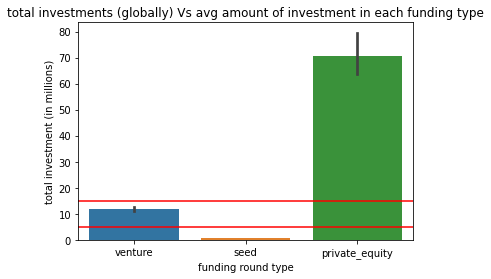

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(6,5), dpi=80, facecolor='w',edgecolor='k')
df=master_frame.loc[(master_frame.funding_round_type.isin( ['venture','seed','private_equity']))]
barplot=sns.barplot(x='funding_round_type',y='raised_amount_usd_in_mil',data=df)
barplot.set(xlabel='funding round type', ylabel='total investment (in millions)')
plt.axhline(5,color='red')
plt.axhline(15,color='red')
barplot.set_title('total investments (globally) Vs avg amount of investment in each funding type')
plt.show()

2.create a plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. (below)

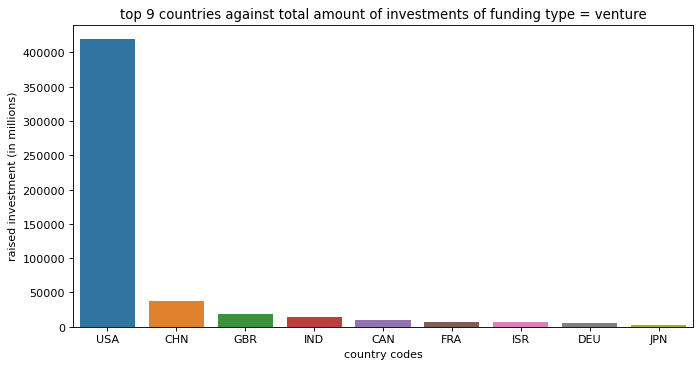

In [76]:
# plot showing top 9 countries against the total amount of investments of funding type FT
plt.figure(figsize=(10,5), dpi=80, facecolor='w',edgecolor='k')
plot_top9=sns.barplot(x='country_code',y='raised_amount_usd_in_mil', data=top9)
plot_top9.set(xlabel='country codes', ylabel='raised investment (in millions)')
plot_top9.set_title('top 9 countries against total amount of investments of funding type = venture')
plt.show()

3.A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

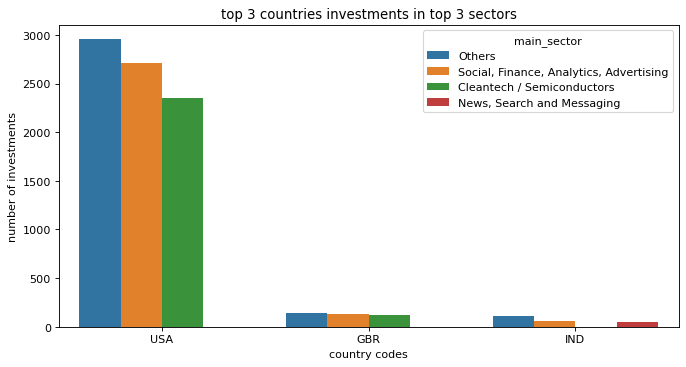

In [238]:
# collecting details of top 3 counties with their respective top 3 sectors and corresponding investment count in one data frame.
D1_top3_investment=D1.groupby(['main_sector','country_code'],as_index=False)['investment_count'].count().sort_values(by='investment_count', ascending=False).head(3)
D2_top3_investment=D2.groupby(['main_sector','country_code'],as_index=False)['investment_count'].count().sort_values(by='investment_count', ascending=False).head(3)
D3_top3_investment=D3.groupby(['main_sector','country_code'],as_index=False)['investment_count'].count().sort_values(by='investment_count', ascending=False).head(3)
# concatinating
top3_country_investment=pandas.concat([D1_top3_investment,D2_top3_investment,D3_top3_investment],axis=0)

# showing the top3 countries and their corresponding top 3 sectors and their investments count in bar plot
plt.figure(figsize=(10,5), dpi=80, facecolor='w',edgecolor='k')
top3_country_investment_plt=sns.barplot(x='country_code',y='investment_count', hue='main_sector', data=top3_country_investment)
top3_country_investment_plt.set(xlabel='country codes', ylabel='number of investments')
top3_country_investment_plt.set_title('top 3 countries investments in top 3 sectors')
plt.show()